###### Introduction to Network Analysis 2023/24 (iv)

## Small-world and scale-free models, graphs vs networks

You are given six networks in Pajek format.

+ Zachary karate club network ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ Map of Darknet from Tor network ([darknet.net](http://lovro.fri.uni-lj.si/ina/nets/darknet.net))
+ IMDb actors collaboration network ([collaboration_imdb.net](http://lovro.fri.uni-lj.si/ina/nets/collaboration_imdb.net))
+ WikiLeaks cable reference network ([wikileaks.net](http://lovro.fri.uni-lj.si/ina/nets/wikileaks.net))
+ Enron e-mail communication network ([enron.net](http://lovro.fri.uni-lj.si/ina/nets/enron.net))
+ A small part of Google web graph ([www_google.net](http://lovro.fri.uni-lj.si/ina/nets/www_google.net))

### II. Barab&aacute;si-Albert and Price scale-free graphs



In [1]:
import math
import random
import networkx as nx
import matplotlib.pyplot as plt
import utils

1. **(discuss)** Study the following two algorithms for generating Barab&aacute;si-Albert scale-free graphs $G(n,c)$ and Price scale-free graphs $G(n,c,a)$ using the relation $\frac{q+a}{n(c+a)}=\frac{c}{c+a}\frac{q}{nc}+\frac{a}{c+a}\frac{1}{n}$. What is the main difference between the algorithms? What is the time complexity of the algorithms?

	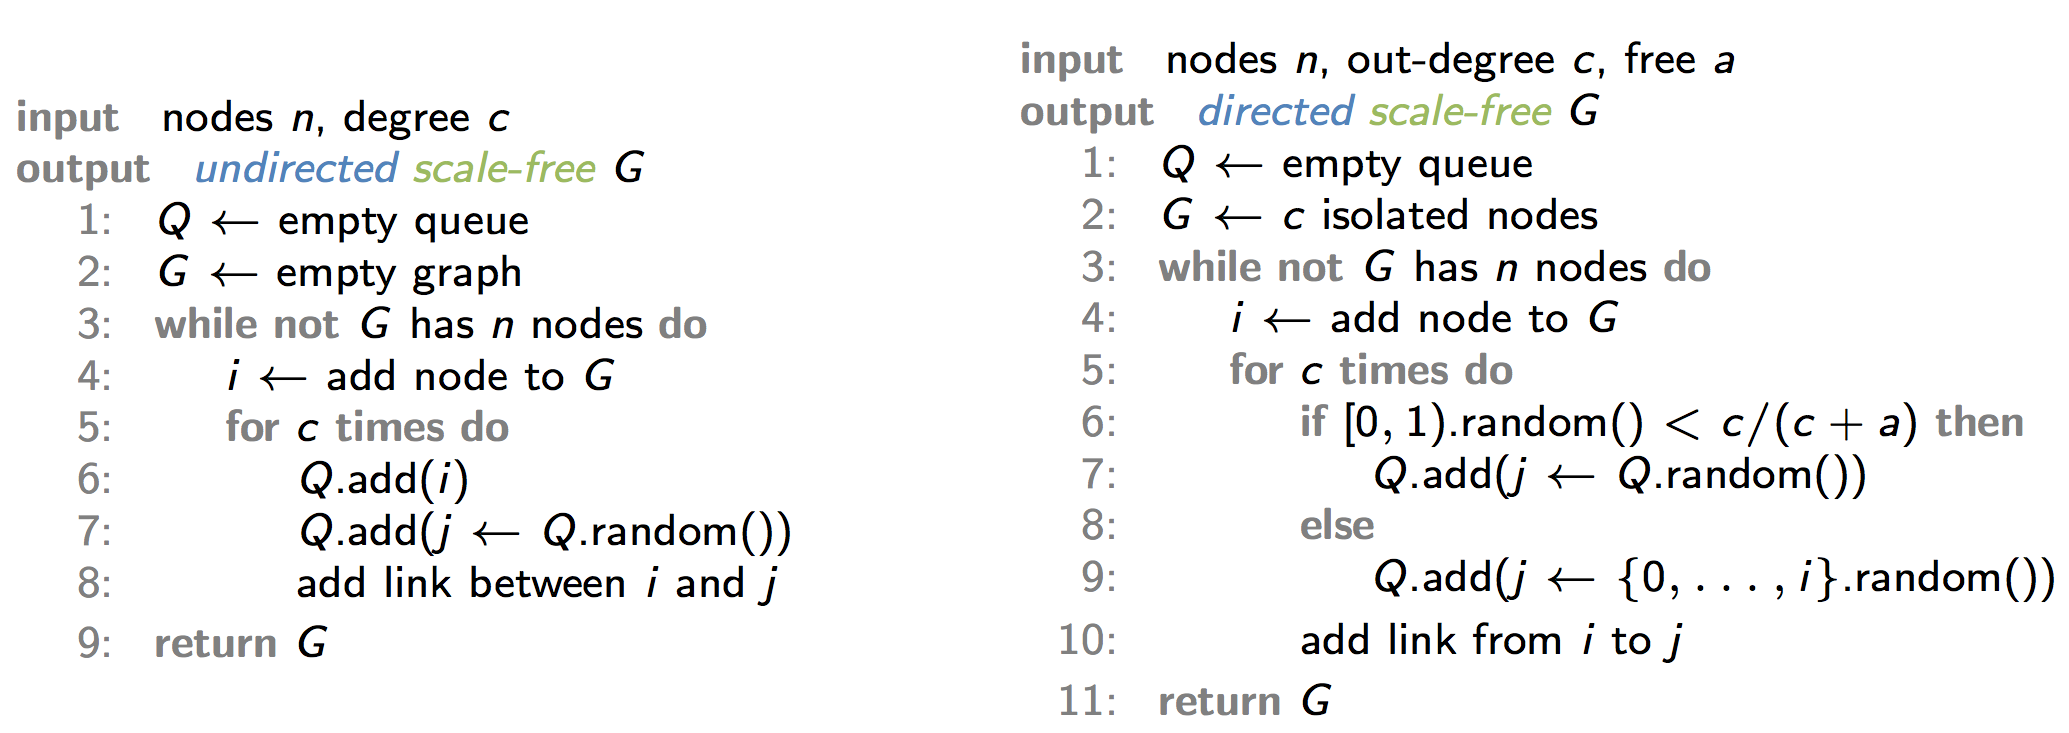


BA model generates network with $n$ nodes, where each node adds $c$ undirected links to existing nodes when generated. The links are connected to the existing nodes with the probability proportional to the node's degree. The algorithm requires efficient node selection proportional to degree. We address this by adding list of node indices, where index appears as often as degree. To select a node we connect to, simply select one from the list.

In the algorithm, queue will represent our list of nodes. To create a network, continously add nodes and generate $c$ connections, selecting one node from the queue as our destination. In the end, update the queue to match the new degrees. Generated graph will be undirected scale free network with degree distribution of about $p_k \sim k^{-3}$.

Unlike BA, Price model generates a **directed** network with $n$ nodes, where each node will add $c$ links to the existing nodes with probability proportional to it's in-degree plus $a$ ($q_i + a$). Here we use the same idea of queue representation for node selection. Since $a$ is not limited to being an integer, use the trick which samples according to the in-degree from the queue $\frac{c}{c+a}$ times and uniformly from all the nodes the rest of the time. Generated graph will have a degree distribtuion of $p_q \sim q^{-2-\frac{a}{c}}$.

Both of the algorithm's time complexities are linear.

**NOTE**: BA is a special case of a Price model, where $a$ is $c$ and we treat the final graph as undirected.

2. **(code)** Implement both algorithms and generate Barab&aacute;si-Albert and Price scale-free graphs corresponding to larger networks above. Plot their degree distribution $p_{k}$ and compute power-law exponents $\gamma$ of seemingly scale-free distributions using the maximum likelihood formula below. Are the results expected?

$$\gamma=1+\bar{n}\left[\sum_{i=1}^{n}\ln\frac{k_i}{k_{min}-\frac{1}{2}}\delta(k_i\geq k_{min})\right]^{-1}$$

Let's translate the formula into a form CS student will understand:
- $\delta(k_i\geq k_{min})$: Kronecker delta function will return 1 if current degree $k_i$ is larger or equal then predefined $k_{min}$, else 0.
- $\bar{n}$ is the amount of $k_i$ which are used in the sum (where Kronecker delta is 1).


Other parts of the equation are self explainatory. Sample implementation would look like:


```python
# requires numpy array of degrees
def calc_gamma(degrees, k_min):
    # keeps only the elements that have Kronecker delta of 1
    # or in other terms that have degree higher than k_min
    degrees = degrees[degrees >= k_min]
    n_dot = len(degrees)

    sum_value = np.sum(np.log(degrees / (k_min - 0.5)))
    gamma = 1 + n_dot * (1 / sum_value)

    return gamma
```

Implementation that works with graphs is provided bellow.


**NOTE**: Maximum likehood formula assumes the network is scale-free and will return nonsensible result otherwise.

In [2]:
def power_law(G, kmin=10):
    n = 0
    sumk = 0
    for _, k in G.degree():
        if k >= kmin:
            sumk += math.log(k)
            n += 1
    return 1 + 1 / (sumk / n - math.log(kmin - 0.5)) if n > 0 else math.nan

  MultiGraph | 'darknet'
       Nodes | 7,178 (iso=0)
       Edges | 25,104 (loop=0)
      Degree | 6.99 (max=5,583)
         LCC | 100.0% (n=1)
  Clustering | 0.7061



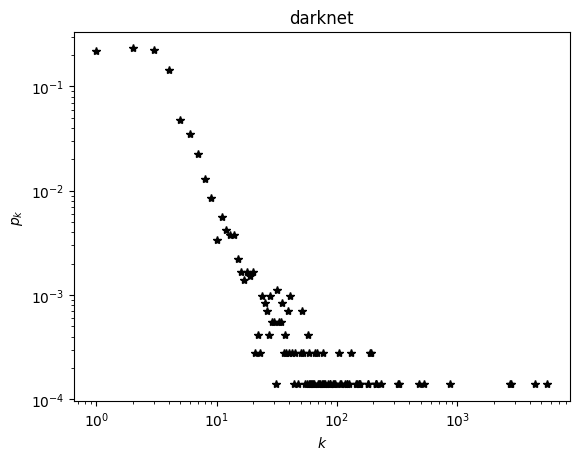

MultiDiGraph | 'price'
       Nodes | 7,178 (iso=0)
       Edges | 21,525 (loop=0)
      Degree | 3.00 max(in=9034, out=3)
         LCC | 100.0% (n=1)
  Clustering | 0.3370



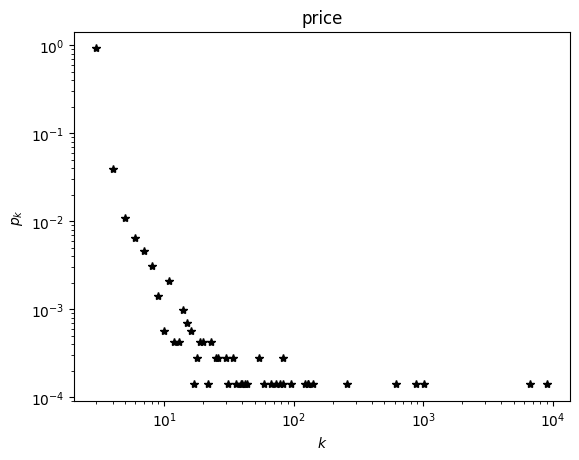

  MultiGraph | 'barabasi_albert'
       Nodes | 7,178 (iso=0)
       Edges | 21,525 (loop=18)
      Degree | 6.00 (max=300)
         LCC | 100.0% (n=1)
  Clustering | 0.0065



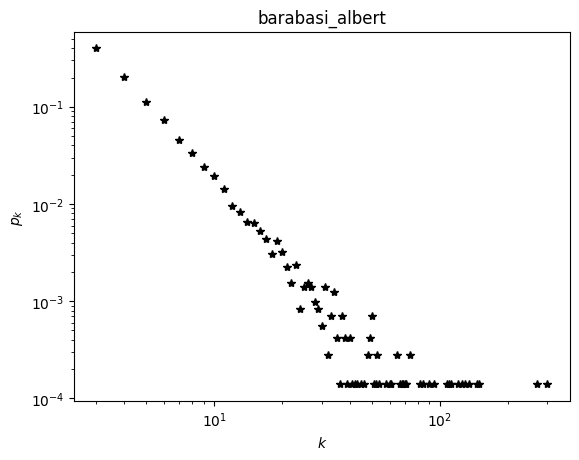

  MultiGraph | 'collaboration_imdb'
       Nodes | 17,577 (iso=0)
       Edges | 287,074 (loop=0)
      Degree | 32.66 (max=784)
         LCC | 99.3% (n=19)
  Clustering | 0.3380



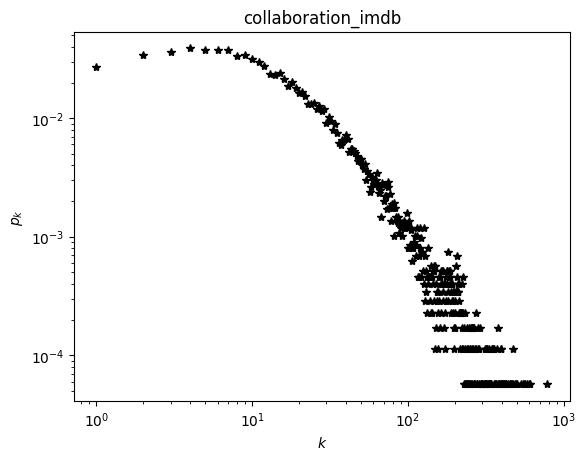

MultiDiGraph | 'price'
       Nodes | 17,577 (iso=0)
       Edges | 280,976 (loop=47)
      Degree | 15.99 max(in=1488, out=16)
         LCC | 100.0% (n=1)
  Clustering | 0.0109



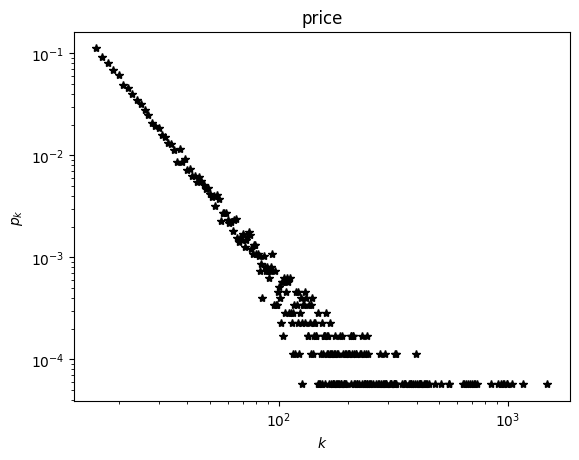

  MultiGraph | 'barabasi_albert'
       Nodes | 17,577 (iso=0)
       Edges | 280,976 (loop=48)
      Degree | 31.97 (max=1,598)
         LCC | 100.0% (n=1)
  Clustering | 0.0107



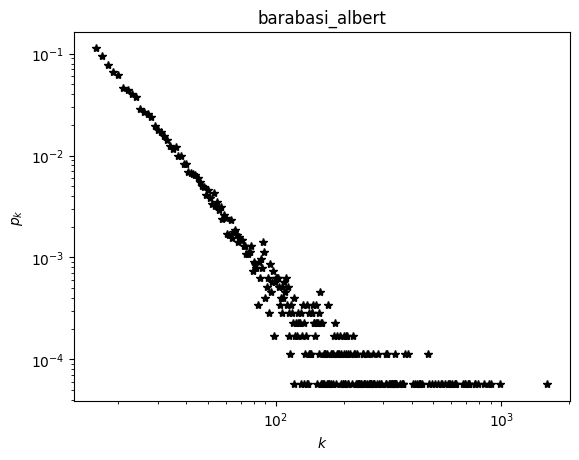

MultiDiGraph | 'wikileaks'
       Nodes | 52,416 (iso=0)
       Edges | 78,506 (loop=0)
      Degree | 1.50 max(in=383, out=53)
         LCC | 100.0% (n=1)
  Clustering | 0.1821



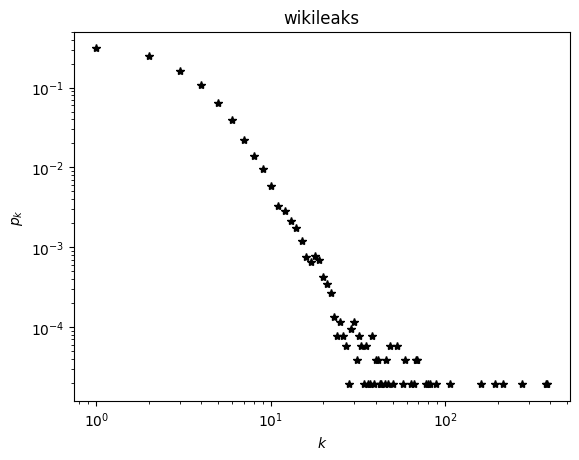

MultiDiGraph | 'price'
       Nodes | 52,416 (iso=0)
       Edges | 52,415 (loop=6)
      Degree | 1.00 max(in=89, out=1)
         LCC | 76.7% (n=7)
  Clustering | 0.0000



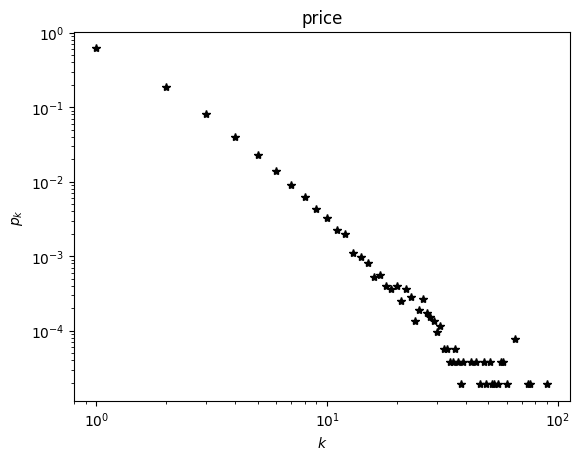

  MultiGraph | 'barabasi_albert'
       Nodes | 52,416 (iso=0)
       Edges | 52,415 (loop=5)
      Degree | 2.00 (max=354)
         LCC | 82.9% (n=6)
  Clustering | 0.0000



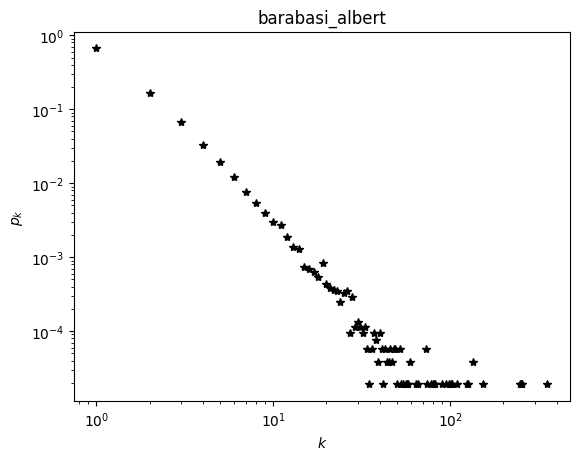

MultiDiGraph | 'enron'
       Nodes | 87,273 (iso=0)
       Edges | 1,148,072 (loop=13,082)
      Degree | 13.15 max(in=6166, out=32619)
         LCC | 96.7% (n=1,331)
  Clustering | 0.1175



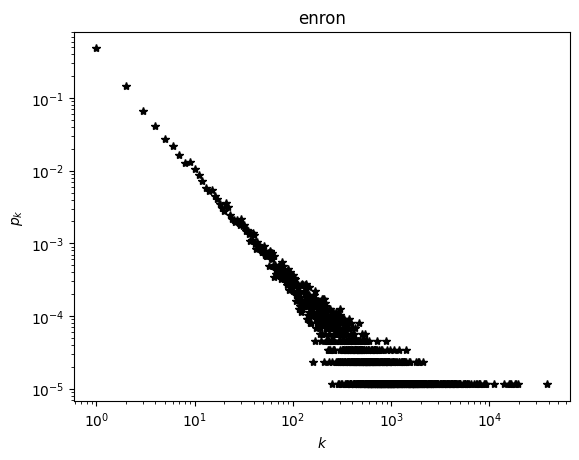

MultiDiGraph | 'price'
       Nodes | 87,273 (iso=0)
       Edges | 1,134,380 (loop=47)
      Degree | 13.00 max(in=3112, out=13)
         LCC | 100.0% (n=1)
  Clustering | 0.0026



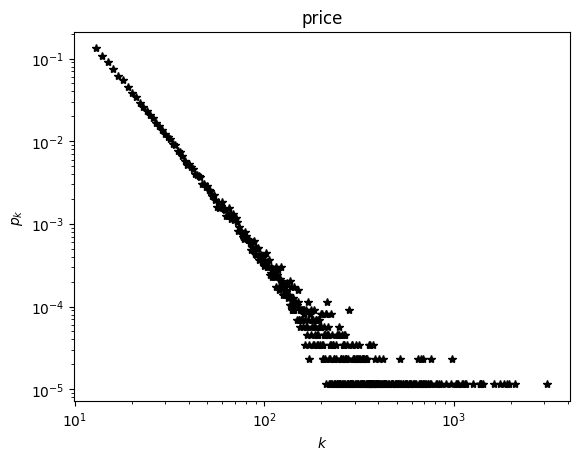

  MultiGraph | 'barabasi_albert'
       Nodes | 87,273 (iso=0)
       Edges | 1,134,380 (loop=63)
      Degree | 26.00 (max=3,222)
         LCC | 100.0% (n=1)
  Clustering | 0.0026



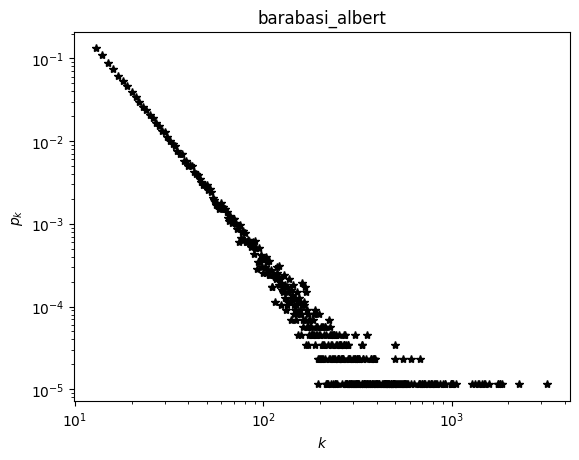

MultiDiGraph | 'www_google'
       Nodes | 875,713 (iso=0)
       Edges | 5,105,039 (loop=0)
      Degree | 5.83 max(in=6326, out=456)
         LCC | 97.7% (n=2,746)
  Clustering | 0.5187



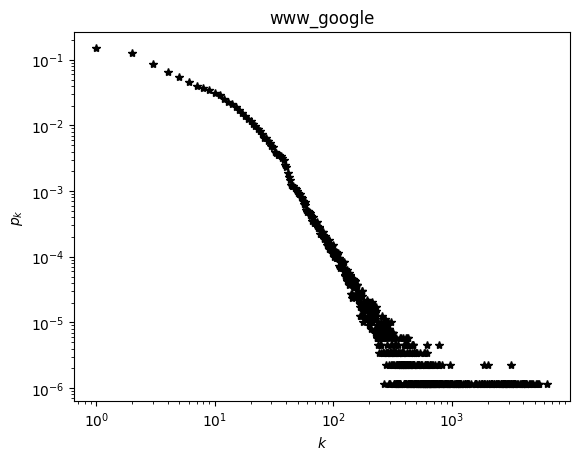

MultiDiGraph | 'price'
       Nodes | 875,713 (iso=0)
       Edges | 5,254,242 (loop=21)
      Degree | 6.00 max(in=64952, out=6)
         LCC | 100.0% (n=1)
  Clustering | 0.0100



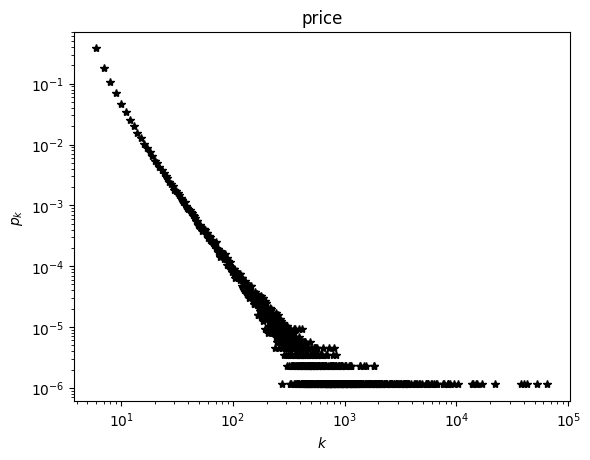

  MultiGraph | 'barabasi_albert'
       Nodes | 875,713 (iso=0)
       Edges | 5,254,242 (loop=39)
      Degree | 12.00 (max=7,501)
         LCC | 100.0% (n=1)
  Clustering | 0.0002



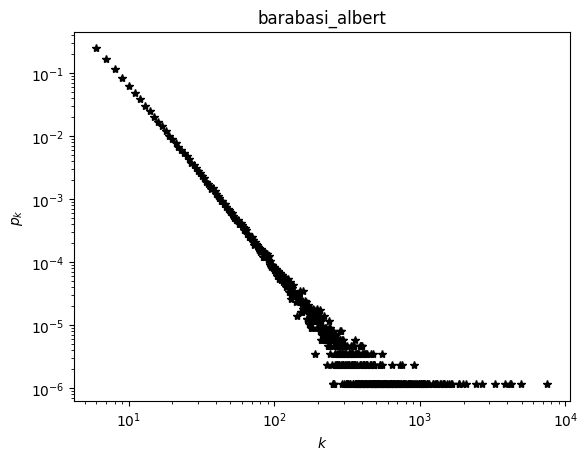

In [3]:
def price(n, c, a):
    G = nx.MultiDiGraph(name="price")
    edges = []
    G.add_node(0)
    for i in range(1, c + 1):
        G.add_node(i)
        edges.append((0, i))
    for i in range(len(G), n):
        G.add_node(i)
        for _ in range(c):
            if random.random() < c / (c + a):
                edges.append((i, random.choice(edges)[1]))
            else:
                edges.append((i, random.randint(0, i)))
    G.add_edges_from(edges)
    return G


def barabasi_albert(n, c):
    return nx.MultiGraph(price(n, c, c), name="barabasi_albert")


def plot(G):
    nk = {}
    for _, k in G.degree():
        if k not in nk:
            nk[k] = 0
        nk[k] += 1
    ks = sorted(nk.keys())

    plt.loglog(ks, [nk[k] / len(G) for k in ks], '*k')
    plt.title(G.name)
    plt.ylabel('$p_k$')
    plt.xlabel('$k$')
    plt.show()


for name in ["darknet", "collaboration_imdb", "wikileaks", "enron", "www_google"]:
    G = utils.read_pajek(name)

    utils.info(G)
    plot(G)

    n = G.number_of_nodes()
    m = G.number_of_edges()

    gamma = power_law(G)
    c = round(m / n)
    a = c if gamma <= 2 else c * (gamma - 2)

    G = price(n, c, a)

    utils.info(G)
    plot(G)

#  G = nx.barabasi_albert_graph(n, c)
    G = barabasi_albert(n, c)

    utils.info(G)
    plot(G)


|     $p$        | $m$ | $n$ | $\langle k \rangle$ | $\gamma$ | $\langle d \rangle$ | $\langle C \rangle$ |
|---------------------|--|-|-----------------|-------------------|-------------------|---------------------|
|  darknet |  7,178  |  25,104  |  6.99  |  2.03  |  2.31  |  0.7061 |
|  darknet (PR) |  7,178  |  21,525  |  6.00  |  2.14  |  2.12  |  0.2712 |
|  darknet (BA) |  7,178  |  21,525  |  6.00  |  2.79  |  4.11  |  0.0066 |
|  collaboration_imdb |  17,577  |  287,074  |  32.66  |  1.85  |  4.73  |  0.3391 |
|  collaboration_imdb (PR) |  17,577  |  280,976  |  31.97  |  1.99  |  2.89  |  0.0107 |
|  collaboration_imdb (BA) |  17,577  |  280,976  |  31.97  |  1.99  |  2.88  |  0.0111 |
|  wikileaks |  52,416  |  78,506  |  3.00  |  3.67  |  22.88  |  0.1864 |
|  wikileaks (PR) |  52,416  |  52,415  |  2.00  |  3.36  |  11.84  |  0.0000 |
|  wikileaks (BA) |  52,416  |  52,415  |  2.00  |  2.88  |  9.99  |  0.0000 |
|  enron |  87,273  |  1,148,072  |  26.31  |  1.66  |  4.84  |  0.1193 |
|  enron (PR) |  87,273  |  1,134,380  |  26.00  |  2.25  |  3.37  |  0.0025 |
|  enron (BA) |  87,273  |  1,134,380  |  26.00  |  2.25  |  3.37  |  0.0026 |
|  www_google |  875,713  |  5,105,039  |  11.66  |  2.37  |  6.43  |  0.5143 |
|  www_google (PR) |  875,713  |  5,254,242  |  12.00  |  2.74  |  3.62  |  0.0097 |
|  www_google (BA) |  875,713  |  5,254,242  |  12.00  |  2.87  |  4.61  |  0.0002 |

Price and Barab&aacute;si-Albert model manage to approximate the power law coefficient of the network very well. We can notice that due to the process of generating networks, the average degree will be the same among both of them. when compared to real netwoks, they still differ in some of the propeties, most notably in lower average distances and substantially underestimated clustering coefficient.   


MultiDiGraph | 'price_2.01'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=2)
      Degree | 9.99 max(in=22159, out=10)
         LCC | 100.0% (n=1)
    Distance | 1.18 (max=3)
  Clustering | 0.1721

gamma:	1.697436521623802


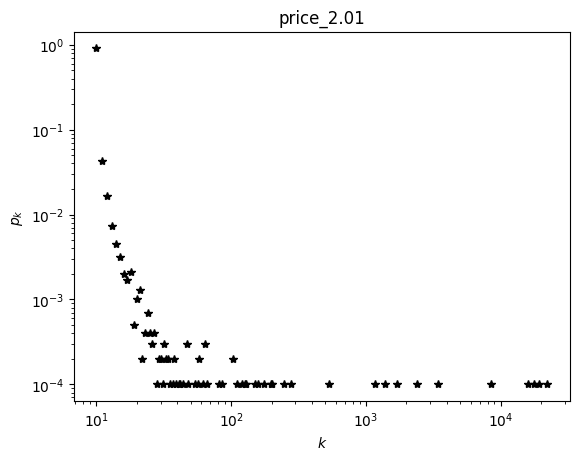

MultiDiGraph | 'price_2.25'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=17)
      Degree | 9.99 max(in=11324, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.22 (max=15)
  Clustering | 0.1502

gamma:	2.4829922123594685


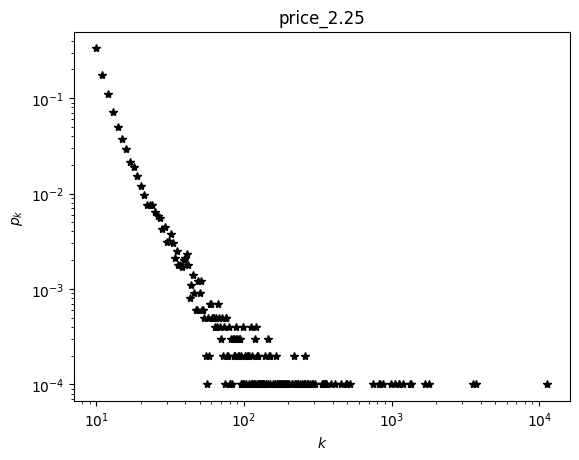

MultiDiGraph | 'price_2.5'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=15)
      Degree | 9.99 max(in=2445, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.53 (max=16)
  Clustering | 0.0462

gamma:	2.643445709451578


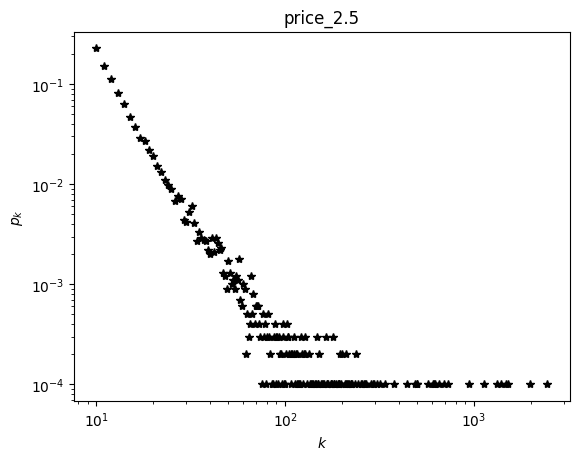

MultiDiGraph | 'price_2.75'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=29)
      Degree | 9.99 max(in=1147, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.56 (max=16)
  Clustering | 0.0199

gamma:	2.804168618891392


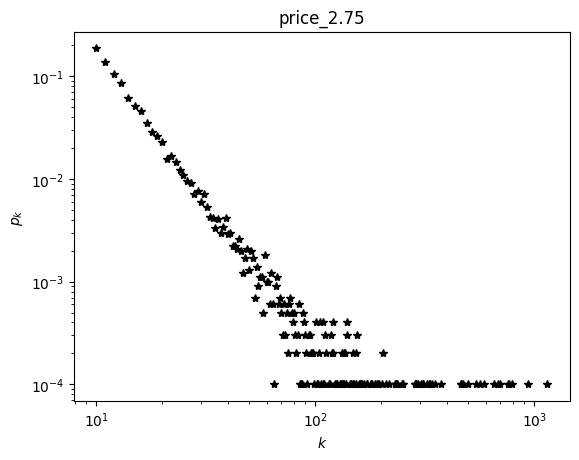

MultiDiGraph | 'price_3.0'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=39)
      Degree | 9.99 max(in=690, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.70 (max=18)
  Clustering | 0.0115

gamma:	2.904145755444657


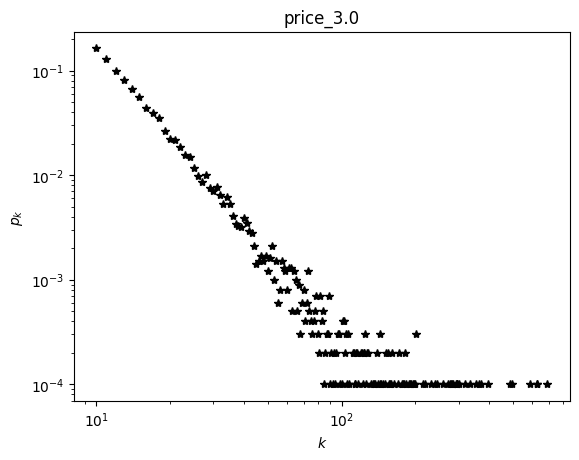

MultiDiGraph | 'price_4.0'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=56)
      Degree | 9.99 max(in=323, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.64 (max=15)
  Clustering | 0.0050

gamma:	3.2742915355893376


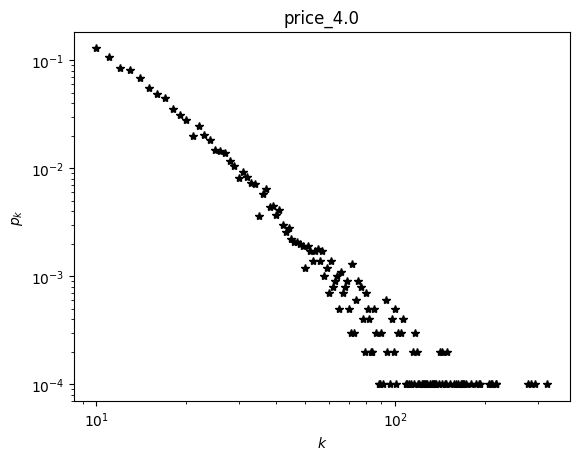

MultiDiGraph | 'price_5.0'
       Nodes | 10,000 (iso=0)
       Edges | 99,900 (loop=43)
      Degree | 9.99 max(in=198, out=10)
         LCC | 100.0% (n=1)
    Distance | 4.59 (max=19)
  Clustering | 0.0041

gamma:	3.432330986819627


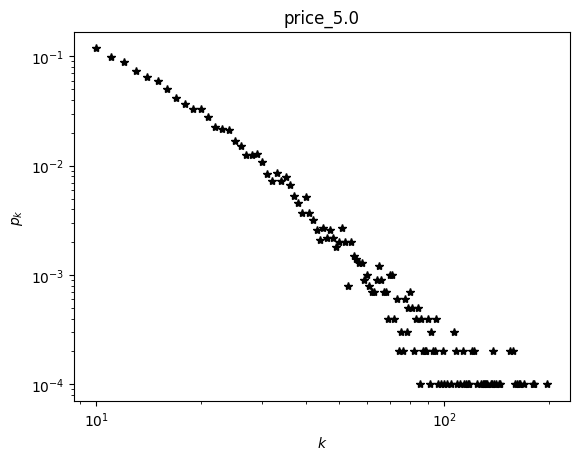

In [5]:
n = 10000
c = 10

for gamma in [2.01, 2.25, 2.5, 2.75, 3.0, 4.0, 5.0]:
    G = price(n, c, c * (gamma - 2))
    G.name += "_" + str(gamma)

    utils.info(G, distance_sample=100)
    print(f"gamma:\t{power_law(G, kmin=25)}")
    plot(G)

|     $\gamma$        | $\langle k \rangle$ | real $\gamma$ | $\langle d \rangle$ | $\langle C \rangle$ |
|---------------------|-------------------|-------------------|-------------------|---------------------|
|  2.01 |    20.00  |  2.15  |  2.00  |  0.1530 |
|  2.25 |   20.00  |  2.50  |  2.68  |  0.0787 |
|  2.5 |  20.00  |  2.67  |  3.12  |  0.0144 |
|  2.75 |   20.00  |  2.84  |  3.48  |  0.0042 |
|  3.0 |   20.00  |  2.95  |  3.58  |  0.0020 |
|  4.0 |  20.00  |  3.26  |  3.84  |  0.0006 |
|  5.0 |  20.00  |  3.45  |  3.94  |  0.0005 |

Each network will contain 100,000 nodes and 999,900 edges. We see that gamma is somewhat well approximatted, with it being a bit underestimated.